In [1]:
#A1.
import pandas as pd

# Load the Excel file (replace 'your_file.xlsx' with the actual file path)
df = pd.read_excel('C:\\Users\\Jyoshitha\\Downloads\\training_mathbert.xlsx')

# Separate features and target
X = df.iloc[:, :-1]  # All columns except the last one
y = df['output']  # Target column

# Handle missing values by dropping rows with NaN in the target
df_cleaned = df.dropna(subset=['output'])

# Use one attribute ('embed_0') for X_train
X_train_single = df_cleaned[['embed_0']]
y_train = df_cleaned['output']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train_single, X_test_single, y_train, y_test = train_test_split(X_train_single, y_train, test_size=0.2, random_state=42)

# Impute missing values in features
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_single_imputed = imputer.fit_transform(X_train_single)
X_test_single_imputed = imputer.transform(X_test_single)

# Train the linear regression model
from sklearn.linear_model import LinearRegression
reg_single = LinearRegression().fit(X_train_single_imputed, y_train)

# Make predictions
y_train_pred = reg_single.predict(X_train_single_imputed)
y_test_pred = reg_single.predict(X_test_single_imputed)


In [3]:
#A2.

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Calculate metrics for training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the metrics
print(f"Training Set - MSE: {mse_train}, RMSE: {rmse_train}, MAPE: {mape_train}, R2: {r2_train}")
print(f"Test Set - MSE: {mse_test}, RMSE: {rmse_test}, MAPE: {mape_test}, R2: {r2_test}")


Training Set - MSE: 1.361858675693005, RMSE: 1.1669870075082263, MAPE: 142324572671023.0, R2: 0.0052754335314768586
Test Set - MSE: 1.3885595634666783, RMSE: 1.1783715727505812, MAPE: 60703281590984.914, R2: -0.00881950367199047


In [7]:
#A3.

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
# Drop rows where the target variable 'output' is missing
df_cleaned = df.dropna(subset=['output'])

# Separate features and target
X = df_cleaned.iloc[:, :-1]  # All columns except the last one
y = df_cleaned['output']  # Target column

# Split the data into training and test sets
X_train_all, X_test_all, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
X_train_all_imputed = imputer.fit_transform(X_train_all)
X_test_all_imputed = imputer.transform(X_test_all)

# Train the model using all features
reg_all = LinearRegression().fit(X_train_all_imputed, y_train)

# Predict on training and test data
y_train_pred_all = reg_all.predict(X_train_all_imputed)
y_test_pred_all = reg_all.predict(X_test_all_imputed)

# Calculate metrics for the training set
mse_train_all = mean_squared_error(y_train, y_train_pred_all)
rmse_train_all = np.sqrt(mse_train_all)
mape_train_all = mean_absolute_percentage_error(y_train, y_train_pred_all)
r2_train_all = r2_score(y_train, y_train_pred_all)

# Calculate metrics for the test set
mse_test_all = mean_squared_error(y_test, y_test_pred_all)
rmse_test_all = np.sqrt(mse_test_all)
mape_test_all = mean_absolute_percentage_error(y_test, y_test_pred_all)
r2_test_all = r2_score(y_test, y_test_pred_all)

# Print the results
print(f"Training Set (All Features) - MSE: {mse_train_all}, RMSE: {rmse_train_all}, MAPE: {mape_train_all}, R2: {r2_train_all}")
print(f"Test Set (All Features) - MSE: {mse_test_all}, RMSE: {rmse_test_all}, MAPE: {mape_test_all}, R2: {r2_test_all}")


Training Set (All Features) - MSE: 0.3445174376129378, RMSE: 0.5869560780952334, MAPE: 24193396994216.58, R2: 0.7483586477165207
Test Set (All Features) - MSE: 1.834998104626921, RMSE: 1.3546210188192567, MAPE: 12819173047613.68, R2: -0.33316706452772715


In [9]:
#A4.

from sklearn.cluster import KMeans

# Remove the target variable for clustering
X_cluster = df_cleaned.iloc[:, :-1]

# Impute missing values
X_cluster_imputed = imputer.fit_transform(X_cluster)

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_cluster_imputed)

# Get the cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

print("Cluster Labels:", labels)
print("Cluster Centers:", centers)

Cluster Labels: [1 0 0 ... 1 1 1]
Cluster Centers: [[-6.43163397e-02  1.35119249e-01  1.21115913e-01  1.87344662e-01
  -5.56479746e-01 -1.30810628e-01  2.70768114e-01  8.56379993e-02
   1.51309951e-01 -3.87023471e-02  2.03547445e-01 -1.35500880e-01
   2.06626292e-01  5.45275295e-04 -1.51002359e-01  1.37079900e-01
  -3.64296146e-01  1.57472194e-02 -4.85023565e-01 -2.31058245e-01
   5.81266664e-02 -2.81929742e-01 -3.14682549e-01  5.01178256e-02
   2.12865367e-01  1.50091729e-01 -4.74222886e-02  1.07263408e-01
   1.66651015e-01 -5.90431328e-02  2.07458289e-01  5.53443614e-02
   2.89672697e-01 -2.19169891e-01 -6.98688101e-02 -8.61633602e-02
  -2.13591473e-01  2.97514195e-01  4.28806295e-02  1.15165661e-01
   7.13873418e-02  1.05341734e-01  1.57361367e-01  6.65060029e-02
   2.47450999e-01 -1.35276269e-01  3.14854318e-02  1.94071124e-01
   1.10606117e-01  2.48597800e-02 -8.46829246e-02  1.55654602e-01
   2.89360815e-02 -1.55897159e-01 -2.09196637e-01 -1.35037826e-01
  -2.85876126e-02 -1.4924

In [11]:
#A5.

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette = silhouette_score(X_cluster_imputed, kmeans.labels_)

# Calculate Calinski-Harabasz Score
ch_score = calinski_harabasz_score(X_cluster_imputed, kmeans.labels_)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_cluster_imputed, kmeans.labels_)

print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Score: {ch_score}")
print(f"Davies-Bouldin Index: {db_index}")


Silhouette Score: 0.08275127986105797
Calinski-Harabasz Score: 89.06708033325287
Davies-Bouldin Index: 3.4822425173977454


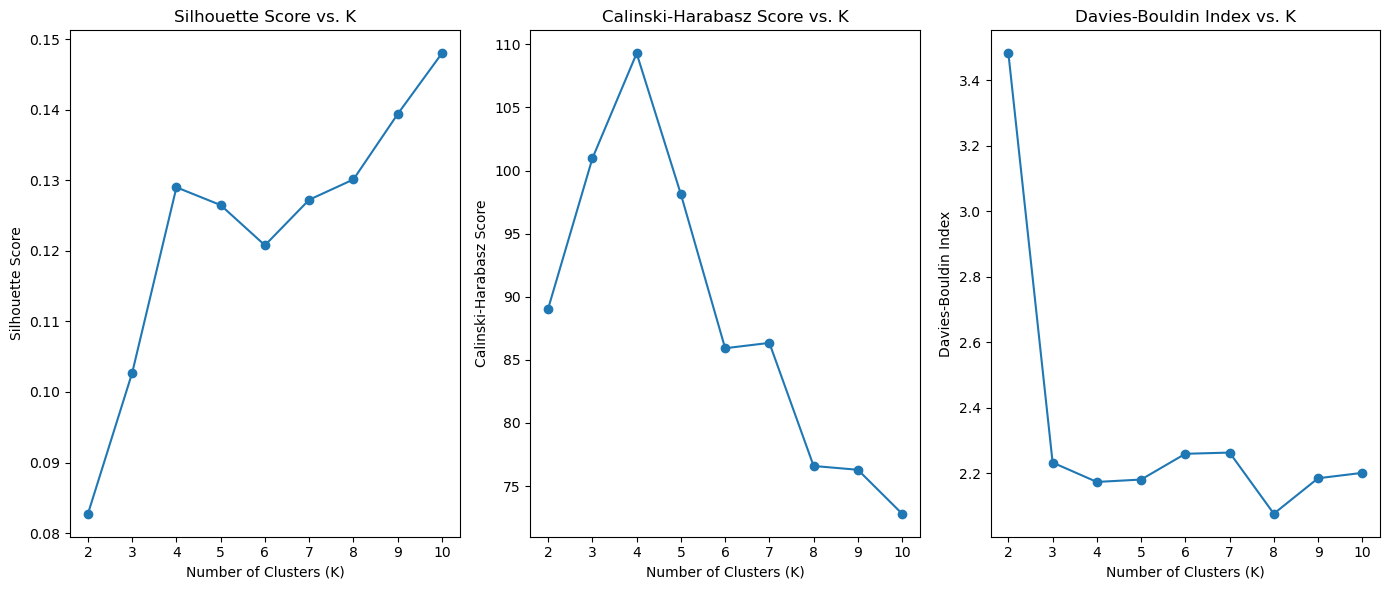

In [13]:
#A6.

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Range of k values to test
k_values = range(2, 11)  # You can expand this range as needed
silhouette_scores = []
ch_scores = []
db_indexes = []

# Impute missing values
X_cluster_imputed = imputer.fit_transform(X_cluster)

# Perform k-means clustering for each k and evaluate the metrics
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_cluster_imputed)
    
    labels = kmeans.labels_
    
    silhouette = silhouette_score(X_cluster_imputed, labels)
    ch_score = calinski_harabasz_score(X_cluster_imputed, labels)
    db_index = davies_bouldin_score(X_cluster_imputed, labels)
    
    silhouette_scores.append(silhouette)
    ch_scores.append(ch_score)
    db_indexes.append(db_index)

# Plot the metrics
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title('Calinski-Harabasz Score vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, db_indexes, marker='o')
plt.title('Davies-Bouldin Index vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()


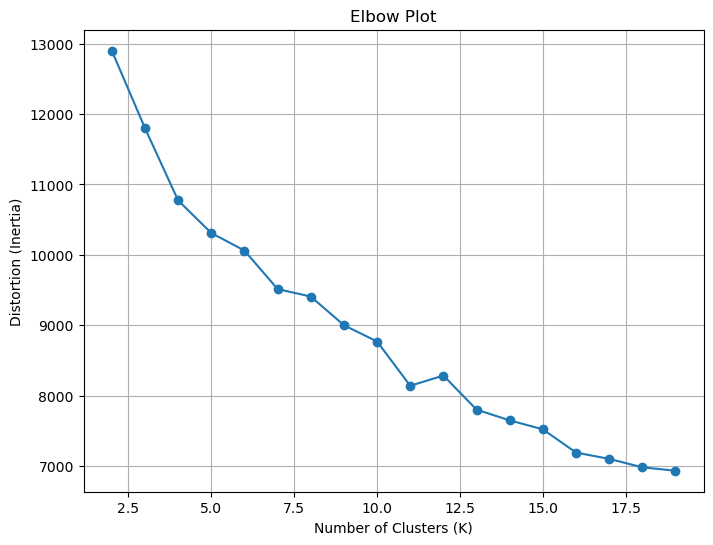

In [15]:
#A7.

distortions = []

# Perform k-means for k from 2 to 19 and calculate the inertia (distortion)
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_cluster_imputed)
    distortions.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.grid(True)
plt.show()